<a href="https://colab.research.google.com/github/DumodHansika/Machine-Learning_Question01/blob/main/Assignment_ML_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import os
sb.set()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Data = pd.read_csv('/content/drive/MyDrive/ML/bank-full.csv')

In [ ]:
Data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
Data.shape

(45211, 17)

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
Data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [ ]:
Data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
Data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

In [ ]:
Data.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

In [ ]:
correlation = Data.corr()
correlation

<ipython-input-41-9ff738db1e63>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = Data.corr()


,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


<Axes: >

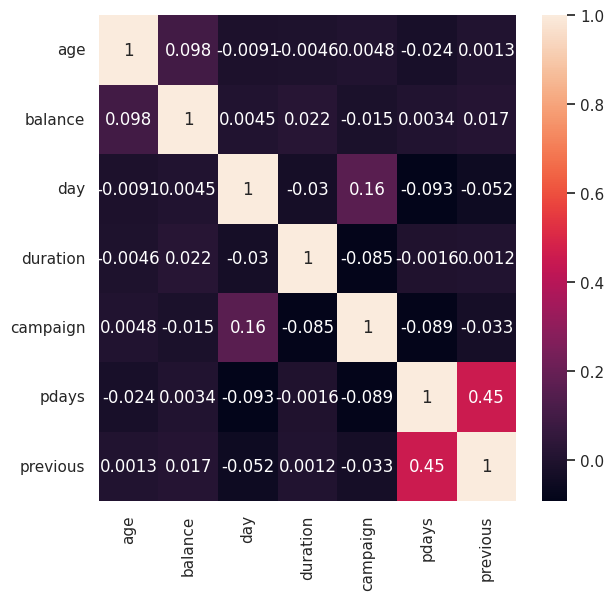

In [ ]:
sb.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

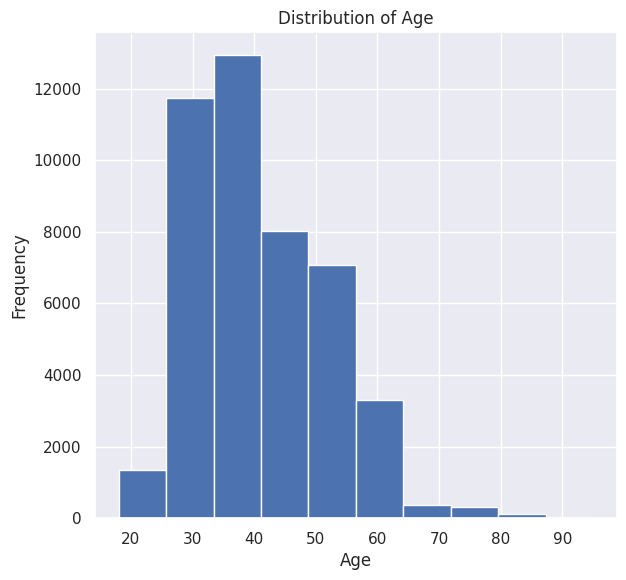

In [ ]:
import matplotlib.pyplot as plt

# Plot a histogram of the 'age' variable
plt.hist(Data['age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()


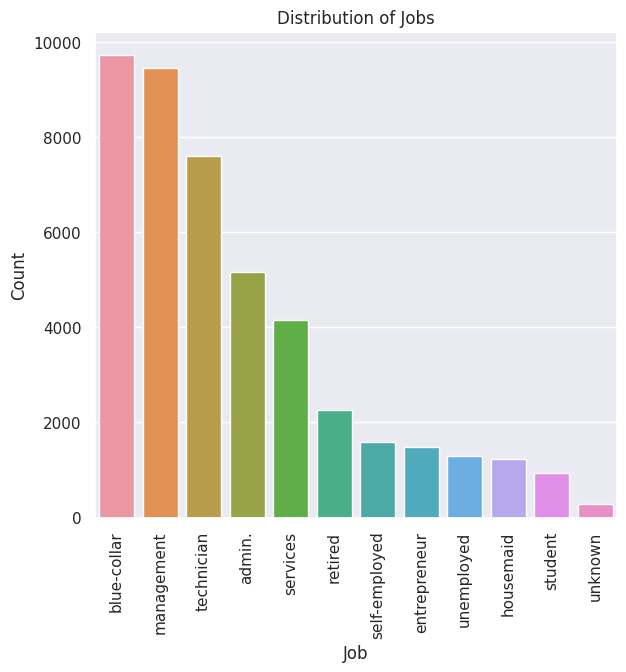

In [ ]:
# Count the frequencies of each 'job' category and plot a bar chart
job_counts = Data['job'].value_counts()
sb.barplot(x=job_counts.index, y=job_counts.values)
plt.xlabel('Job')
plt.ylabel('Count')
plt.title('Distribution of Jobs')
plt.xticks(rotation=90)
plt.show()

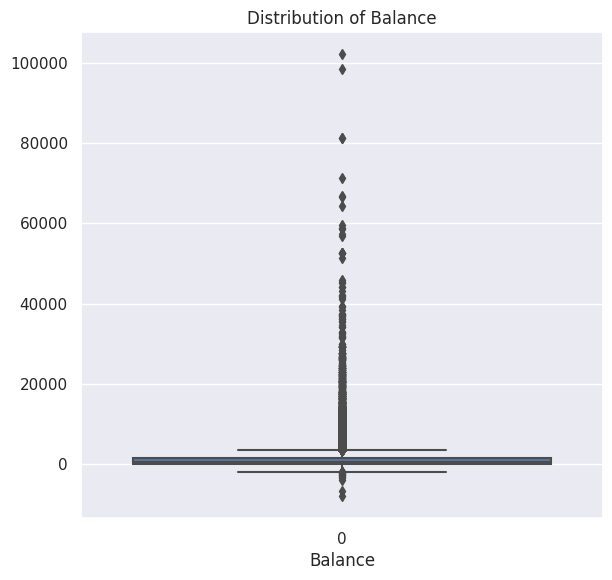

In [ ]:
# Plot a box plot of the 'balance' variable
sb.boxplot(Data['balance'])
plt.xlabel('Balance')
plt.title('Distribution of Balance')
plt.show()

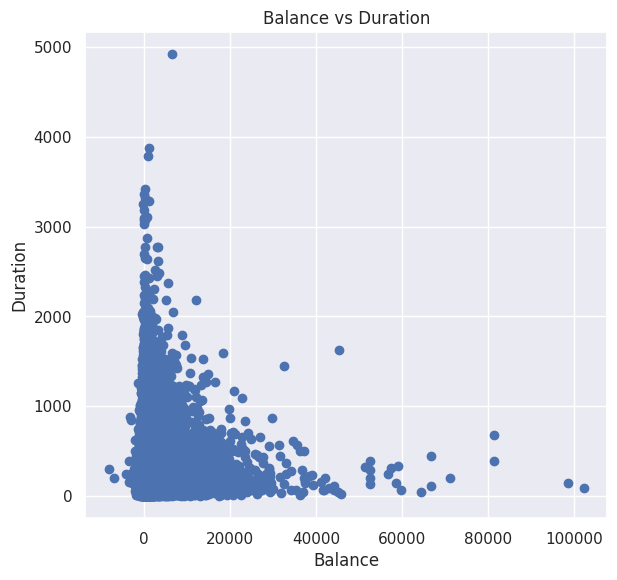

In [ ]:
# Plot a scatter plot of 'balance' against 'duration'
plt.scatter(Data['balance'], Data['duration'])
plt.xlabel('Balance')
plt.ylabel('Duration')
plt.title('Balance vs Duration')
plt.show()

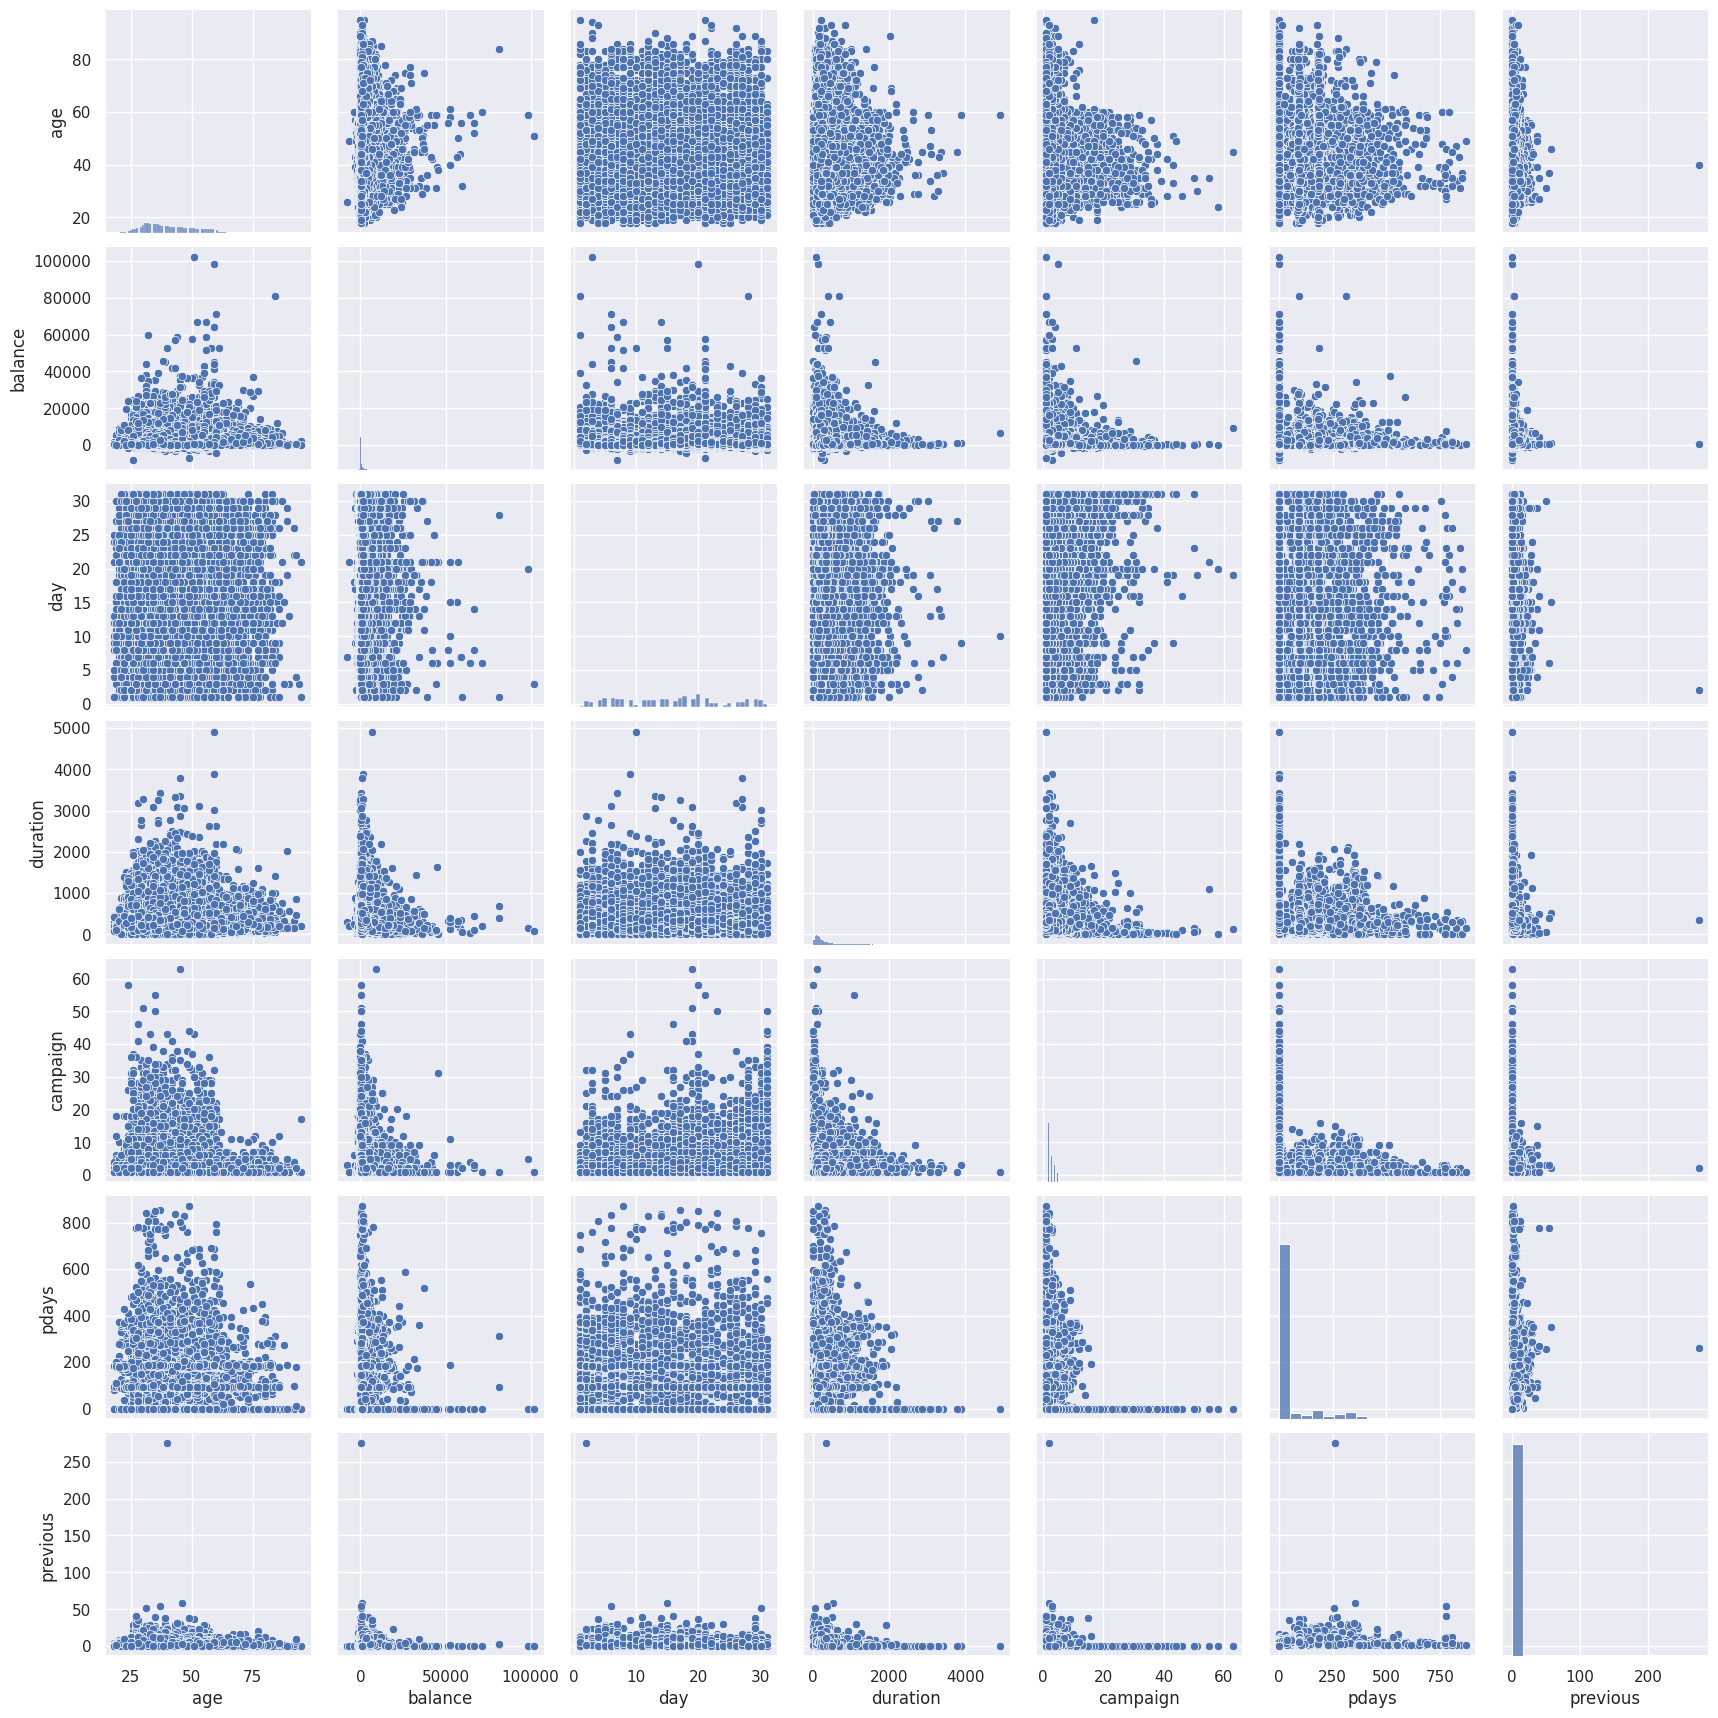

In [ ]:
# Plot pairwise relationships between variables
sb.pairplot(Data)
plt.show()

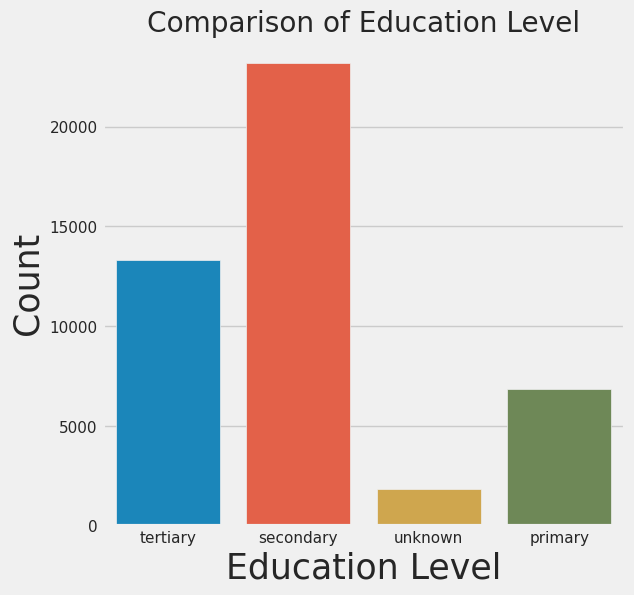

In [ ]:
plt.rcParams['figure.figsize'] = (6,6)
plt.style.use('fivethirtyeight')

sb.countplot(data  = Data,  x = 'education')
plt.title('Comparison of Education Level', fontweight=27)
plt.xlabel('Education Level', fontsize=25)
plt.ylabel('Count', fontsize=25)
plt.show()

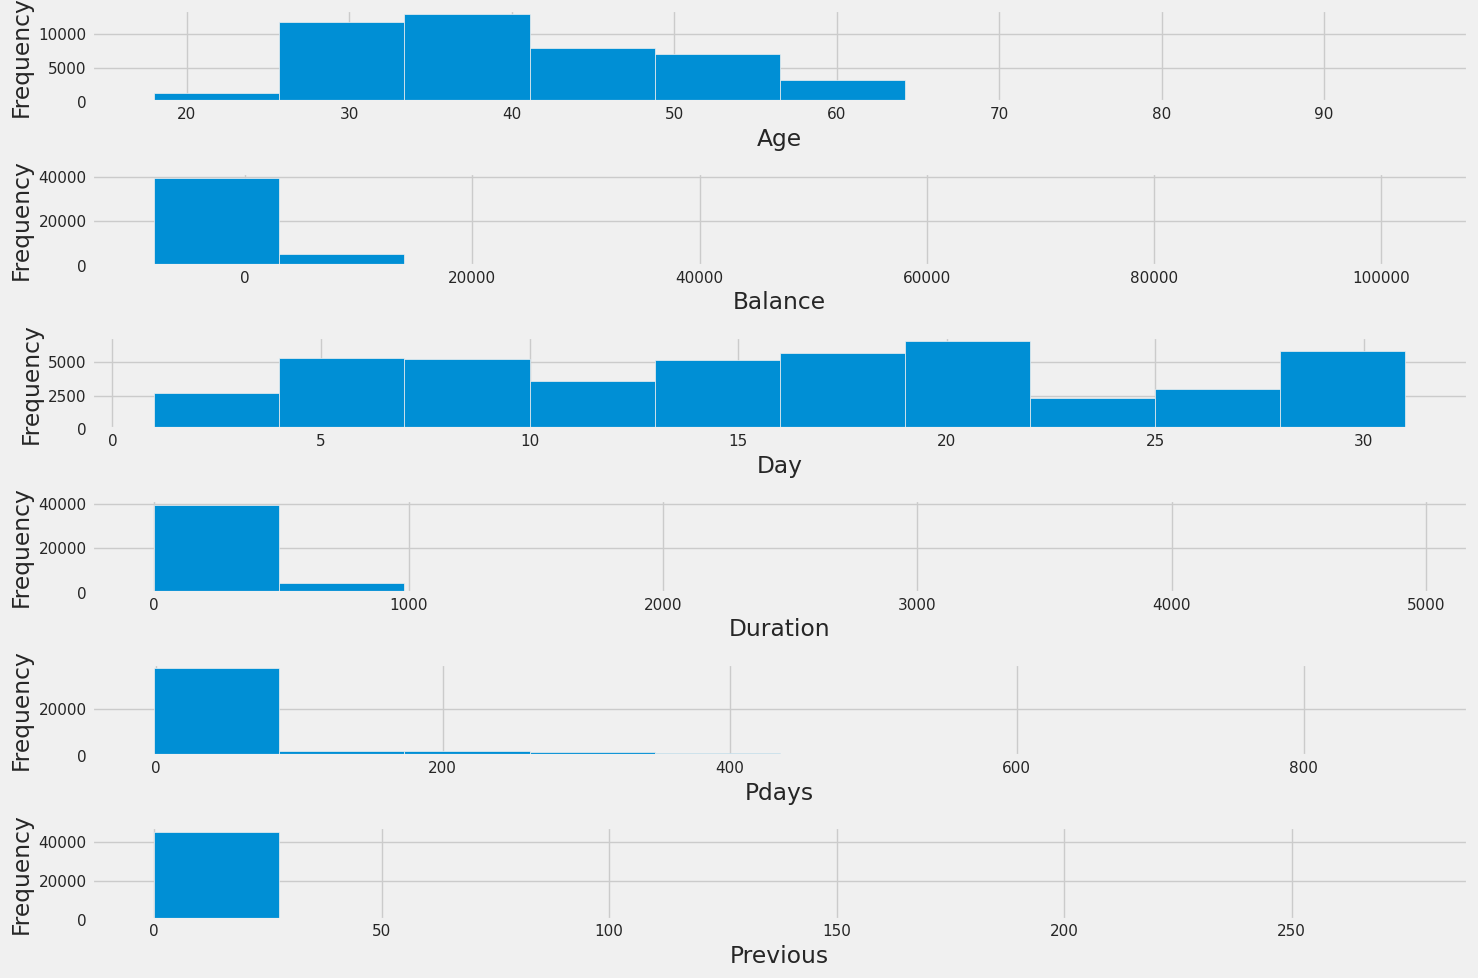

In [ ]:
# Get the list of numerical columns
numerical_columns = ['age', 'balance', 'day', 'duration', 'pdays', 'previous']

# Set up the figure and axes
fig, axes = plt.subplots(len(numerical_columns), 1, figsize=(15, 10))

# Loop through each numerical column and create a histogram
for i, column in enumerate(numerical_columns):
    axes[i].hist(Data[column], bins=10)
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_ylabel('Frequency')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
Data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Create an instance of LabelEncoder
le = LabelEncoder()

# Perform label encoding on the "Category" column
Data["job_nw"] = le.fit_transform(Data["job"])

Data["marital_nw"] = le.fit_transform(Data["marital"])

Data["education_nw"] = le.fit_transform(Data["education"])

Data["Target_nw"] = le.fit_transform(Data["Target"])

Data["default_nw"] = le.fit_transform(Data["default"])

Data["housing_nw"] = le.fit_transform(Data["housing"])

Data["loan_nw"] = le.fit_transform(Data["loan"])

Data["contact_nw"] = le.fit_transform(Data["contact"])

Data["month_nw"] = le.fit_transform(Data["month"])

In [ ]:
Data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,Target,job_nw,marital_nw,education_nw,Target_nw,default_nw,housing_nw,loan_nw,contact_nw,month_nw
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,no,4,1,2,0,0,1,0,2,8
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,no,9,2,1,0,0,1,0,2,8
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,no,2,1,1,0,0,1,1,2,8
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,no,1,1,3,0,0,1,0,2,8
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,no,11,2,3,0,0,0,0,2,8


In [ ]:
Data.drop(columns=['job'], inplace=True)
Data.drop(columns=['marital'], inplace=True)
Data.drop(columns=['education'], inplace=True)
Data.drop(columns=['Target'], inplace=True)
Data.drop(columns=['default'], inplace=True)
Data.drop(columns=['housing'], inplace=True)
Data.drop(columns=['loan'], inplace=True)
Data.drop(columns=['contact'], inplace=True)
Data.drop(columns=['month'], inplace=True)

In [ ]:
Data.head()

,age,balance,day,duration,campaign,pdays,previous,poutcome,job_nw,marital_nw,education_nw,Target_nw,default_nw,housing_nw,loan_nw,contact_nw,month_nw
0,58,2143,5,261,1,-1,0,unknown,4,1,2,0,0,1,0,2,8
1,44,29,5,151,1,-1,0,unknown,9,2,1,0,0,1,0,2,8
2,33,2,5,76,1,-1,0,unknown,2,1,1,0,0,1,1,2,8
3,47,1506,5,92,1,-1,0,unknown,1,1,3,0,0,1,0,2,8
4,33,1,5,198,1,-1,0,unknown,11,2,3,0,0,0,0,2,8


In [ ]:
Data.shape

(45211, 17)

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Define the independent and dependent variables
X = Data[['job_nw','marital_nw','education_nw','default_nw','housing_nw','loan_nw','contact_nw','month_nw']]
y = Data["Target_nw"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8793541966161672


In [ ]:
#calculating the classification accuracies
print("Training Accuracy", model.score(X_train, y_train)) 
print("Testing Accuracy", model.score(X_test, y_test))

Training Accuracy 0.8839305463393055
Testing Accuracy 0.8793541966161672


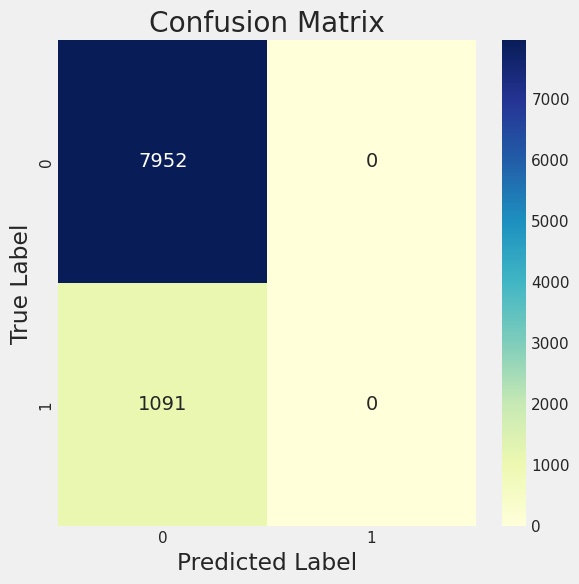

In [ ]:
from sklearn.metrics import confusion_matrix

# compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# display the confusion matrix as a heatmap
sb.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")

# customize the plot
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
# generate classification report
report = classification_report(y_test, y_pred)

# print the report
print(report)

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7952
           1       0.00      0.00      0.00      1091

    accuracy                           0.88      9043
   macro avg       0.44      0.50      0.47      9043
weighted avg       0.77      0.88      0.82      9043



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
